### Wave propagation in a simple 2D network

In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline

sys.path.append('/Users/rkp/Dropbox/Repositories/be_more_spontaneous')
sys.path.append('/Users/rkp/Dropbox/Repositories')
from figure_magic import axis_tools
import network

In [2]:
ACTIVATION_STRENGTH = 4
INACTIVATION_STRENGTH = -2
THRESHOLD = 7.5
STEEPNESS = 2
WEIGHT_TYPE = 'nearest_neighbor_diagonal'

INITIAL_VS = np.array([
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],

    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],

    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],

    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [1, 2, 3, 4, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 1, 2, 3, 4,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
        
    [0, 1, 2, 3, 4,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 1, 2, 3, 4,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [1, 2, 3, 4, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
    [0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,    0, 0, 0, 0, 0,],
])

In [3]:
ntwk = network.DiscreteTimeSquareLattice(
    shape=INITIAL_VS.shape,
    activation_strength=ACTIVATION_STRENGTH,
    inactivation_strength=INACTIVATION_STRENGTH,
    threshold=THRESHOLD,
    steepness=STEEPNESS,
    weight_type=WEIGHT_TYPE,
)
ntwk.vs_matrix = INITIAL_VS

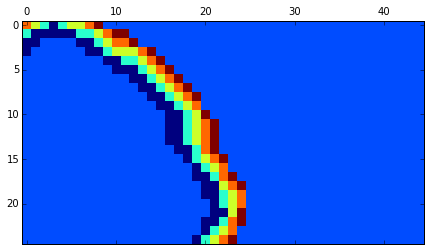

In [31]:
plt.matshow(ntwk.vs_matrix, vmin=-1, vmax=ACTIVATION_STRENGTH)
ntwk.step()

### Save a video of a large network

In [1303]:
from embedded_animation import Mp4Animation

In [1304]:
N_STEPS = 400
INTERVAL = 33
SAVE_FILE = 'wave00.mp4'

In [1305]:
ACTIVATION_STRENGTH = 5
INACTIVATION_STRENGTH = -2
THRESHOLD = 12.5
STEEPNESS = .6
WEIGHT_TYPE = 'nearest_neighbor_diagonal'

INITIAL_VS = np.zeros((100, 100))

In [1306]:
def update_matrix(t, ax, data):
    ax.imshow(data[t])

In [1307]:
ntwk = network.DiscreteTimeSquareLattice(
    shape=INITIAL_VS.shape,
    activation_strength=ACTIVATION_STRENGTH,
    inactivation_strength=INACTIVATION_STRENGTH,
    threshold=THRESHOLD,
    steepness=STEEPNESS,
    weight_type=WEIGHT_TYPE,
)
ntwk.vs_matrix = INITIAL_VS
ntwk.store_voltages = True

In [1308]:
for step in range(N_STEPS):
    ntwk.step()

In [1309]:
data = [vs.reshape(ntwk.shape) for vs in ntwk.vs_history]

In [1310]:
fig, ax = plt.subplots(1, 1)
anim = Mp4Animation()
anim.make_animation(
    fname=SAVE_FILE,
    fig=fig,
    update_func=update_matrix,
    plot_objects=ax,
    data=data,
    n_frames=N_STEPS, 
    interval=INTERVAL)